In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
### SET UP DF ###

xlsx = pd.ExcelFile('CSP Thesis - Data - 11 March 2023.xlsx')
lang_df = pd.read_excel(xlsx, 's2p2t')
lang_df.set_index(lang_df.iloc[:,0])
lang_df = lang_df[lang_df.src != lang_df.pvt]
print(lang_df)
lang_df.dtypes

           name src pvt tgt      csls
5    s54w6ktu57  de  en  fr  0.737919
6    s54w6ktu57  de  en  es  0.740970
7    s54w6ktu57  de  en  it  0.744260
8    s54w6ktu57  de  en  pt  0.617939
9    s54w6ktu57  fr  en  es  0.714568
..          ...  ..  ..  ..       ...
171  fi8a4i4v9g  es  pt  de  0.742282
172  fi8a4i4v9g  it  pt  de  0.730697
174  fi8a4i4v9g  es  pt  fr  0.775601
175  fi8a4i4v9g  it  pt  fr  0.762413
177  fi8a4i4v9g  it  pt  es  0.778989

[150 rows x 5 columns]


name     object
src      object
pvt      object
tgt      object
csls    float64
dtype: object

In [3]:
### SET UP LANGUAGE DICTIONARY FOR FUTURE ITERATION ###

lang_dict = {
    0: "en",
    1: "de",
    2: "fr",
    3: "es",
    4: "it",
    5: "pt"
}
len(lang_dict)

6

In [4]:
### FIGURE OUT BEST PVT FOR GIVEN SRC/TGT PAIR ###

src = 'en'
tgt = 'de'

max_csls = max(lang_df[(lang_df.src == src) & (lang_df.tgt == tgt)].csls)
best_pvt = lang_df[(lang_df.csls == max_csls) & (lang_df.src == src)].pvt

print("src: ", src, "\ntgt: ", tgt, "\npvt: ", best_pvt.to_string(index=False), "\ncsls: ", max_csls)

src:  en 
tgt:  de 
pvt:  es 
csls:  0.770073175430297


In [5]:
### SAME BUT USING DICTIONARY ###

src_d = 1
tgt_d = 2

max_csls = max(lang_df[(lang_df.src == lang_dict[src_d]) & (lang_df.tgt == lang_dict[tgt_d])].csls)
best_pvt = lang_df[(lang_df.csls == max_csls) & (lang_df.src == lang_dict[src_d])].pvt

new = max_csls
old = lang_df[(lang_df.src == lang_dict[src_d]) & (lang_df.tgt == lang_dict[tgt_d]) & (lang_df.pvt == lang_dict[tgt_d])].csls
pct_imp = (new-old)/new*100

print("src: ", lang_dict[src_d], "\ntgt: ", lang_dict[tgt_d], "\npvt: ", best_pvt.to_string(index=False), "\ncsls: ", max_csls, "\npct_imp: ", round(float(pct_imp),2),"%")

src:  de 
tgt:  fr 
pvt:  it 
csls:  0.739757299423217 
pct_imp:  3.76 %


In [6]:
### FIGURE OUT BEST PVT FOR ALL SRC/TGT PAIRS ###
src_df = [] 
tgt_df = []
pvt_df = []
og_df = []
csls_df = []
pct_imp_df = []

for src_lang in range(0, len(lang_dict)):
    for tgt_lang in range(0,len(lang_dict)):
        if tgt_lang == src_lang: 
            continue
        csls = lang_df[(lang_df.src == lang_dict[src_lang]) & (lang_df.tgt == lang_dict[tgt_lang])].csls
        max_csls = max(csls)
        best_pvt = lang_df[(lang_df.csls == max_csls) & (lang_df.src == lang_dict[src_lang])].pvt
        if best_pvt.to_string(index=False) == lang_dict[tgt_lang]:
            pct_imp = 0 
            old = lang_df[(lang_df.src == lang_dict[src_lang]) & (lang_df.pvt == lang_dict[tgt_lang]) & (lang_df.tgt == lang_dict[tgt_lang])].csls
        else: 
            new = max_csls
            old = lang_df[(lang_df.src == lang_dict[src_lang]) & (lang_df.pvt == lang_dict[tgt_lang]) & (lang_df.tgt == lang_dict[tgt_lang])].csls
            pct_imp = (new - old) / old * 100
        print("src: ", lang_dict[src_lang], "\ntgt: ", lang_dict[tgt_lang], 
            "\npvt: ", best_pvt.to_string(index=False), "\ncsls: ", max_csls, "\npct_imp: ", round(float(pct_imp),2),"%", "\n")
        
        # update vectors for df
        src_df.append(lang_dict[src_lang])
        tgt_df.append(lang_dict[tgt_lang])
        pvt_df.append(best_pvt.to_string(index=False))
        og_df.append(round(float(old),2)) 
        csls_df.append(round(float(max_csls),2))
        pct_imp_df.append(round(float(pct_imp),2))
        

src:  en 
tgt:  de 
pvt:  es 
csls:  0.770073175430297 
pct_imp:  3.41 % 

src:  en 
tgt:  fr 
pvt:  es 
csls:  0.758444011211395 
pct_imp:  3.17 % 

src:  en 
tgt:  es 
pvt:  fr 
csls:  0.772375643253326 
pct_imp:  2.5 % 

src:  en 
tgt:  it 
pvt:  fr 
csls:  0.757510304450988 
pct_imp:  4.45 % 

src:  en 
tgt:  pt 
pvt:  pt 
csls:  0.687951803207397 
pct_imp:  0.0 % 

src:  de 
tgt:  en 
pvt:  es 
csls:  0.770073175430297 
pct_imp:  7.51 % 

src:  de 
tgt:  fr 
pvt:  it 
csls:  0.739757299423217 
pct_imp:  3.9 % 

src:  de 
tgt:  es 
pvt:  pt 
csls:  0.742281556129455 
pct_imp:  3.02 % 

src:  de 
tgt:  it 
pvt:  fr 
csls:  0.746020317077636 
pct_imp:  3.93 % 

src:  de 
tgt:  pt 
pvt:  pt 
csls:  0.656621158123016 
pct_imp:  0.0 % 

src:  fr 
tgt:  en 
pvt:  es 
csls:  0.758444011211395 
pct_imp:  5.94 % 

src:  fr 
tgt:  de 
pvt:  it 
csls:  0.739757299423217 
pct_imp:  0.81 % 

src:  fr 
tgt:  es 
pvt:  de 
csls:  0.785857319831848 
pct_imp:  3.3 % 

src:  fr 
tgt:  it 
pvt:  de 


In [7]:
### SET UP DATASET ###

sig_df = pd.DataFrame([src_df,pvt_df, tgt_df, csls_df, og_df,pct_imp_df],
                     index = ['src','pvt','tgt','pvt_csls','dir_csls','pct_impr'])
sig_df = sig_df.transpose()
sig_df.sort_values(by = 'pct_impr', ascending = False)
#sig_df.sort_values(by = ['src','tgt'])

,src,pvt,tgt,pvt_csls,dir_csls,pct_impr
29,pt,en,it,0.67,0.38,75.48
27,pt,en,fr,0.66,0.39,70.24
28,pt,en,es,0.7,0.43,63.33
26,pt,en,de,0.62,0.39,58.99
5,de,es,en,0.77,0.72,7.51
20,it,fr,en,0.76,0.71,6.64
10,fr,es,en,0.76,0.72,5.94
15,es,fr,en,0.77,0.73,5.72
3,en,fr,it,0.76,0.73,4.45
17,es,de,fr,0.79,0.76,4.04


,name,src,pvt,tgt,csls
5,s54w6ktu57,de,en,fr,0.737919
6,s54w6ktu57,de,en,es,0.740970
7,s54w6ktu57,de,en,it,0.744260
8,s54w6ktu57,de,en,pt,0.617939
9,s54w6ktu57,fr,en,es,0.714568
...,...,...,...,...,...
171,fi8a4i4v9g,es,pt,de,0.742282
172,fi8a4i4v9g,it,pt,de,0.730697
174,fi8a4i4v9g,es,pt,fr,0.775601
175,fi8a4i4v9g,it,pt,fr,0.762413


In [8]:
### MINING DATASET ###
print('total improvement: ', sig_df[sig_df.pct_impr != 0].pct_impr.mean())
print('no 2pt improvement: ', sig_df[sig_df.tgt == 'pt'].pct_impr.mean())
print('pt2 improvement: ', sig_df[sig_df.src == 'pt'].pct_impr.mean())
print('\n')

#pvt percent improvement
en_impr = round(sig_df.loc[(sig_df.pvt == 'en') & (sig_df.pct_impr != 0)].pct_impr.mean(),2)
de_impr = round(sig_df.loc[(sig_df.pvt == 'de') & (sig_df.pct_impr != 0)].pct_impr.mean(),2)
fr_impr = round(sig_df.loc[(sig_df.pvt == 'fr') & (sig_df.pct_impr != 0)].pct_impr.mean(),2)
es_impr = round(sig_df.loc[(sig_df.pvt == 'es') & (sig_df.pct_impr != 0)].pct_impr.mean(),2)
it_impr = round(sig_df.loc[(sig_df.pvt == 'it') & (sig_df.pct_impr != 0)].pct_impr.mean(),2)
pt_impr = round(sig_df.loc[(sig_df.pvt == 'pt') & (sig_df.pct_impr != 0)].pct_impr.mean(),2)

print('en pvt impr: ',en_impr)
print('de pvt impr: ',de_impr)
print('fr pvt impr: ',fr_impr)
print('es pvt impr: ',es_impr)
print('it pvt impr: ',it_impr)
print('pt pvt impr: ',pt_impr)
print("\n")

#pvt mean score
en_mean = round(sig_df.loc[(sig_df.pvt == 'en')].pvt_csls.mean(),4)
de_mean = round(sig_df.loc[(sig_df.pvt == 'de')].pvt_csls.mean(),4)
fr_mean = round(sig_df.loc[(sig_df.pvt == 'fr')].pvt_csls.mean(),4)
es_mean = round(sig_df.loc[(sig_df.pvt == 'es')].pvt_csls.mean(),4)
it_mean = round(sig_df.loc[(sig_df.pvt == 'it')].pvt_csls.mean(),4)
pt_mean = round(sig_df.loc[(sig_df.pvt == 'pt')].pvt_csls.mean(),4)

print('en pvt mean: ',en_mean)
print('de pvt mean: ',de_mean)
print('fr pvt mean: ',fr_mean)
print('es pvt mean: ',es_mean)
print('it pvt mean: ',it_mean)
print('pt pvt mean: ',pt_mean)
print("\n")

#single source mean score 
en_src_mean = round(sig_df.loc[(sig_df.src == 'en')].pvt_csls.mean(),2)
de_src_mean = round(sig_df.loc[(sig_df.src == 'de')].pvt_csls.mean(),2)
fr_src_mean = round(sig_df.loc[(sig_df.src == 'fr')].pvt_csls.mean(),2)
es_src_mean = round(sig_df.loc[(sig_df.src == 'es')].pvt_csls.mean(),2)
it_src_mean = round(sig_df.loc[(sig_df.src == 'it')].pvt_csls.mean(),2)
pt_src_mean = round(sig_df.loc[(sig_df.src == 'pt')].pvt_csls.mean(),2)

print("en src mean: ",en_src_mean)
print('de src mean: ',de_src_mean)
print('fr src mean: ',fr_src_mean)
print('es src mean: ',es_src_mean)
print('it src mean: ',it_src_mean)
print('pt src mean: ',pt_src_mean)
print("\n")

#single target mean score 
en_tgt_mean = round(sig_df.loc[(sig_df.tgt == 'en')].pvt_csls.mean(),4)
de_tgt_mean = round(sig_df.loc[(sig_df.tgt == 'de')].pvt_csls.mean(),4)
fr_tgt_mean = round(sig_df.loc[(sig_df.tgt == 'fr')].pvt_csls.mean(),4)
es_tgt_mean = round(sig_df.loc[(sig_df.tgt == 'es')].pvt_csls.mean(),4)
it_tgt_mean = round(sig_df.loc[(sig_df.tgt == 'it')].pvt_csls.mean(),4)
pt_tgt_mean = round(sig_df.loc[(sig_df.tgt == 'pt')].pvt_csls.mean(),4)

print("en tgt mean: ",en_tgt_mean)
print('de tgt mean: ',de_tgt_mean)
print('fr tgt mean: ',fr_tgt_mean)
print('es tgt mean: ',es_tgt_mean)
print('it tgt mean: ',it_tgt_mean)
print('pt tgt mean: ',pt_tgt_mean)
print("\n")


sig_df[sig_df.pct_impr == 0]

total improvement:  14.349583333333333
no 2pt improvement:  0.0
pt2 improvement:  53.608000000000004


en pvt impr:  67.01
de pvt impr:  3.54
fr pvt impr:  4.11
es pvt impr:  5.01
it pvt impr:  2.36
pt pvt impr:  2.27


en pvt mean:  0.656
de pvt mean:  0.785
fr pvt mean:  0.77
es pvt mean:  0.765
it pvt mean:  0.74
pt pvt mean:  0.7029


en src mean:  0.75
de src mean:  0.73
fr src mean:  0.75
es src mean:  0.77
it src mean:  0.75
pt src mean:  0.66


en tgt mean:  0.738
de tgt mean:  0.724
fr tgt mean:  0.746
es tgt mean:  0.76
it tgt mean:  0.752
pt tgt mean:  0.688




,src,pvt,tgt,pvt_csls,dir_csls,pct_impr
4,en,pt,pt,0.69,0.69,0.0
9,de,pt,pt,0.66,0.66,0.0
14,fr,pt,pt,0.68,0.68,0.0
19,es,pt,pt,0.73,0.73,0.0
24,it,pt,pt,0.68,0.68,0.0
25,pt,en,en,0.63,0.63,0.0


In [20]:
lang_df
en_impr = round(sig_df.loc[(sig_df.pvt == 'en') & (sig_df.pct_impr != 0)].pct_impr.mean(),2)

print(lang_df.loc[lang_df.pvt=='en'].csls.mean(),
lang_df.loc[lang_df.pvt=='de'].csls.mean(),
lang_df.loc[lang_df.pvt=='fr'].csls.mean(),
lang_df.loc[lang_df.pvt=='es'].csls.mean(),
lang_df.loc[lang_df.pvt=='it'].csls.mean(),
lang_df.loc[lang_df.pvt=='pt'].csls.mean())

entm = lang_df.loc[lang_df.pvt=='en'].csls.mean()
detm = lang_df.loc[lang_df.pvt=='de'].csls.mean()
frtm = lang_df.loc[lang_df.pvt=='fr'].csls.mean()
estm = lang_df.loc[lang_df.pvt=='es'].csls.mean()
ittm = lang_df.loc[lang_df.pvt=='it'].csls.mean()
pttm = lang_df.loc[lang_df.pvt=='pt'].csls.mean()

lang_df.loc[lang_df.pvt=='en'].csls.mean()
print(lang_df)

0.7120165179570512 0.6170738542079921 0.6157081079483028 0.6333570384979242 0.6072492969036098 0.7393599700927729
           name src pvt tgt      csls
5    s54w6ktu57  de  en  fr  0.737919
6    s54w6ktu57  de  en  es  0.740970
7    s54w6ktu57  de  en  it  0.744260
8    s54w6ktu57  de  en  pt  0.617939
9    s54w6ktu57  fr  en  es  0.714568
..          ...  ..  ..  ..       ...
171  fi8a4i4v9g  es  pt  de  0.742282
172  fi8a4i4v9g  it  pt  de  0.730697
174  fi8a4i4v9g  es  pt  fr  0.775601
175  fi8a4i4v9g  it  pt  fr  0.762413
177  fi8a4i4v9g  it  pt  es  0.778989

[150 rows x 5 columns]


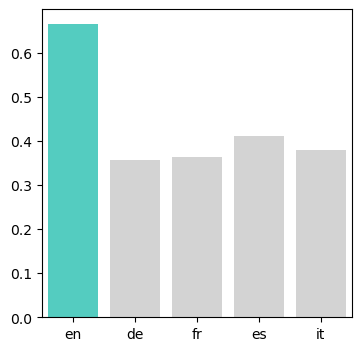

In [9]:
### GRAPH TIME ###

def set_custom_palette(series, max_color = 'turquoise', other_color = 'lightgrey'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

src_lang = 5
tgt_lang = 4

filt_lang = lang_df[(lang_df.src == lang_dict[src_lang]) & (lang_df.tgt == lang_dict[tgt_lang])]

list_pvt = filt_lang.pvt.to_list()
list_csls = filt_lang.csls.to_list()

plt.figure(figsize=(4,4))
ax = sns.barplot(x = 'pvt', y = 'csls', 
            data=filt_lang, 
            palette=set_custom_palette(filt_lang['csls']))
ax.set(xlabel=None, ylabel= None);

In [10]:
pos_dict = { 'lang': ['en', 'de', 'fr','es','it','pt'], 'pos': ['svo', 'svo', 'svo','svo','svo','svo']}
pos_df = pd.DataFrame(pos_dict)
pos_df

,lang,pos
0,en,svo
1,de,svo
2,fr,svo
3,es,svo
4,it,svo
5,pt,svo


In [13]:
### FIGURE OUT WORST PVT FOR ALL SRC/TGT PAIRS ###
src_df = [] 
tgt_df = []
pvt_df = []
og_df = []
csls_df = []
pct_imp_df = []

for src_lang in range(0, len(lang_dict)):
    for tgt_lang in range(0,len(lang_dict)):
        if tgt_lang == src_lang: 
            continue
        csls = lang_df[(lang_df.src == lang_dict[src_lang]) & (lang_df.tgt == lang_dict[tgt_lang])].csls
        min_csls = min(csls)
        wrst_pvt = lang_df[(lang_df.csls == min_csls) & (lang_df.src == lang_dict[src_lang])].pvt
        if wrst_pvt.to_string(index=False) == lang_dict[tgt_lang]:
            pct_detr = 0 
            old = lang_df[(lang_df.src == lang_dict[src_lang]) & (lang_df.pvt == lang_dict[tgt_lang]) & (lang_df.tgt == lang_dict[tgt_lang])].csls
        else: 
            new = min_csls
            old = lang_df[(lang_df.src == lang_dict[src_lang]) & (lang_df.pvt == lang_dict[tgt_lang]) & (lang_df.tgt == lang_dict[tgt_lang])].csls
            pct_detr = (new - old) / old * 100
        print("src: ", lang_dict[src_lang], "\ntgt: ", lang_dict[tgt_lang], 
            "\npvt: ", wrst_pvt.to_string(index=False), "\ncsls: ", min_csls, "\npct_detr: ", round(float(pct_detr),2),"%", "\n")
        
        # update vectors for df
        src_df.append(lang_dict[src_lang])
        tgt_df.append(lang_dict[tgt_lang])
        pvt_df.append(wrst_pvt.to_string(index=False))
        og_df.append(round(float(old),2)) 
        csls_df.append(round(float(min_csls),2))
        pct_imp_df.append(round(float(pct_detr),2))
        

src:  en 
tgt:  de 
pvt:  de 
csls:  0.744707107543945 
pct_detr:  0.0 % 

src:  en 
tgt:  fr 
pvt:  fr 
csls:  0.735149323940277 
pct_detr:  0.0 % 

src:  en 
tgt:  es 
pvt:  es 
csls:  0.753545820713043 
pct_detr:  0.0 % 

src:  en 
tgt:  it 
pvt:  it 
csls:  0.725244343280792 
pct_detr:  0.0 % 

src:  en 
tgt:  pt 
pvt:  de 
csls:  0.345853596925735 
pct_detr:  -49.73 % 

src:  de 
tgt:  en 
pvt:  en 
csls:  0.716259181499481 
pct_detr:  0.0 % 

src:  de 
tgt:  fr 
pvt:  fr 
csls:  0.711972296237945 
pct_detr:  0.0 % 

src:  de 
tgt:  es 
pvt:  es 
csls:  0.720546603202819 
pct_detr:  0.0 % 

src:  de 
tgt:  it 
pvt:  it 
csls:  0.717788755893707 
pct_detr:  0.0 % 

src:  de 
tgt:  pt 
pvt:  it 
csls:  0.343172013759613 
pct_detr:  -47.74 % 

src:  fr 
tgt:  en 
pvt:  en 
csls:  0.71595013141632 
pct_detr:  0.0 % 

src:  fr 
tgt:  de 
pvt:  pt 
csls:  0.733524799346923 
pct_detr:  -0.04 % 

src:  fr 
tgt:  es 
pvt:  en 
csls:  0.714568225542704 
pct_detr:  -6.07 % 

src:  fr 
tgt:  

In [23]:
lang_df[lang_df.pvt=="pt"].csls.mean()
filt_lang

,name,src,pvt,tgt,csls
29,s54w6ktu57,pt,en,it,0.665750
59,xxa9o7od6f,pt,de,it,0.356324
89,zc5u0xt1ur,pt,fr,it,0.364359
119,l2pzvi8zc0,pt,es,it,0.411848
149,og07d0sy6z,pt,it,it,0.379391
